# Linear Models

In this chapter, you will learn how to build, solve, and make predictions with models in TensorFlow 2. You will focus on a simple class of models – the linear regression model – and will try to predict housing prices. By the end of the chapter, you will know how to load and manipulate data, construct loss functions, perform minimization, make predictions, and reduce resource use with batch training.

## Input data
### Load data using pandas

Before you can train a machine learning model, you must first import data. There are several valid ways to do this, but for now, we will use a simple one-liner from pandas: pd.read_csv(). Recall from the video that the first argument specifies the path or URL. All other arguments are optional.

In this exercise, you will import the King County housing dataset, which we will use to train a linear model later in the chapter.



In [1]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing.price)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


* Notice that you did not have to specify a delimiter with the sep parameter, since the dataset was stored in the default, comma-separated format.

### Setting the data type

In this exercise, you will both load data and set its type. Note that housing is available and pandas has been imported as pd. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price'].

**Instructions**

* Import numpy and tensorflow under their standard aliases.
* Use a numpy array to set the tensor price to have a data type of 32-bit floating point number
* Use the tensorflow function cast() to set the tensor waterfront to have a Boolean data type.
* Print price and then waterfront. Did you notice any important differences?



In [2]:
# Import numpy and tensorflow with their standard aliases
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


* Notice that printing price yielded a numpy array; whereas printing waterfront yielded a tf.Tensor()

## Loss functions

**Why do we care about loss functions?**

Here, we plot the MSE, MAE, and Huber loss for error values between minus two and two. Note that the MSE strongly penalizes outliers and has high sensitivity near the minimum. The MAE scales linearly with the size of the error and has low sensitivity near the minimum. And the Huber loss is similar to the MSE near zero and similar to the MAE away from zero. For greater sensitivity near the minimum, you will want to use the MSE or Huber loss. To minimize the impact of outliers, you will want to use the MAE or Huber loss.

### Loss function in Tensorflow

In this exercise, you will compute the loss using data from the King County housing dataset. You are given a target, price, which is a tensor of house prices, and predictions, which is a tensor of predicted house prices. You will evaluate the loss function and print out the value of the loss.

In [4]:
kc_sample = pd.read_csv('./dataset/loss_price.csv')
price = kc_sample['price'].to_numpy()
predictions = kc_sample['pred'].to_numpy()

* Import the keras module from tensorflow. Then, use price and predictions to compute the mean squared error (mse).

In [5]:
# Compute the mean squared error (mse)
loss = tf.keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

141171604777.12717


* Modify your code to compute the mean absolute error (mae), rather than the mean squared error (mse)

In [6]:
# Compute the mean absolute error (mae)
loss = tf.keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

268827.99302088


* You may have noticed that the MAE was much smaller than the MSE, even though price and predictions were the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly.

### Modifying the loss function

In the previous exercise, you defined a tensorflow loss function and then evaluated it once for a set of actual and predicted values. In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.

In [7]:
features=tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
targets=tf.constant([ 2,  4,  6,  8, 10], dtype=tf.float32)

In [8]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, tf.float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


* As you will see in the following lessons, this exercise was the equivalent of evaluating the loss function for a linear regression where the intercept is 0.

## Linear regression

### Set up a linear regression

A univariate linear regression identifies the relationship between a single feature and the target tensor. In this exercise, we will use a property's lot size and price. Just as we discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

In this exercise, you will define the model and the loss function. You will then evaluate the loss function for two different values of intercept and slope. Remember that the predicted values are given by intercept + features*slope. Additionally, note that keras.losses.mse() is available for you. Furthermore, slope and intercept have been defined as variables.

In [9]:
size_log=np.log(np.array(housing['sqft_lot'],np.float32))
price_log=np.log(np.array(housing['price'],np.float32))
bedrooms=np.array(housing['bedrooms'],np.float32)

**Instructions**

* Define a function that returns the predicted values for a linear regression using intercept, features, and slope, and without using add() or multiply().
* Complete the loss_function() by adding the model's variables, intercept and slope, as arguments.
* Compute the mean squared error using targets and predictions.

In [10]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return tf.keras.losses.mse(targets,predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44652
71.866


In the next exercise, you will actually run the regression and train intercept and slope

### Train a linear model

In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

**Instructions**

* Initialize an Adam optimizer as opt with a learning rate of 0.5.
* Apply the .minimize() method to the optimizer.
* Pass loss_function() with the appropriate arguments as a lambda function to .minimize().
* Supply the list of variables that need to be updated to var_list.

In [11]:
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
    size_range = np.linspace(6,14,100)
    price_pred = [intercept + slope * s for s in size_range]
    plt.figure(figsize=(8, 8))
    plt.scatter(size_log, price_log, color = 'black');
    plt.plot(size_range, price_pred, linewidth=3.0, color='red');
    plt.xlabel('log(size)');
    plt.ylabel('log(price)');
    plt.title('Scatterplot of data and fitted regression line');

65.26372
1.4908673
2.3815565
2.9084785
2.6110501
1.7605196
1.3468053
1.3559632
1.2884119
1.2425315


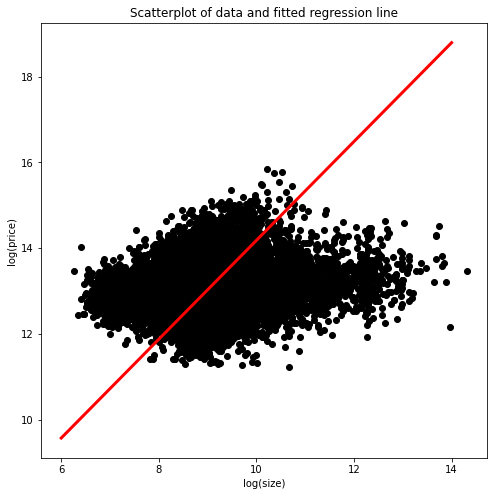

In [12]:
# initialize slope and intercept
intercept = tf.Variable(0.0, tf.float32)
slope = tf.Variable(0.0, tf.float32)

# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

Notice that we printed loss_function(intercept, slope) every 10th execution for 100 executions. Each time, the loss got closer to the minimum as the optimizer moved the slope and intercept parameters closer to their optimal values.

### Multiple linear regression

In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes.

In [16]:
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f},slope_2: {:0.3f}'
                 .format(loss_function(params).numpy(),
                 params[0].numpy(),
                 params[1].numpy(),
                 params[2].numpy()))

In [14]:
params=tf.Variable([0.1 , 0.05, 0.02],dtype=tf.float32)
params

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.1 , 0.05, 0.02], dtype=float32)>

**Instructions**

* Define a linear regression model that returns the predicted values.
* Set loss_function() to take the parameter vector as an input.
* Use the mean absolute error loss.
* Complete the minimization operation.

In [17]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return tf.keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.418, intercept: 0.101, slope_1: 0.051,slope_2: 0.021
loss: 12.404, intercept: 0.102, slope_1: 0.052,slope_2: 0.022
loss: 12.391, intercept: 0.103, slope_1: 0.053,slope_2: 0.023
loss: 12.377, intercept: 0.104, slope_1: 0.054,slope_2: 0.024
loss: 12.364, intercept: 0.105, slope_1: 0.055,slope_2: 0.025
loss: 12.351, intercept: 0.106, slope_1: 0.056,slope_2: 0.026
loss: 12.337, intercept: 0.107, slope_1: 0.057,slope_2: 0.027
loss: 12.324, intercept: 0.108, slope_1: 0.058,slope_2: 0.028
loss: 12.311, intercept: 0.109, slope_1: 0.059,slope_2: 0.029
loss: 12.297, intercept: 0.110, slope_1: 0.060,slope_2: 0.030


* Note that params[2] tells us how much the price will increase in percentage terms if we add one more bedroom. You could train params[2] and the other model parameters by increasing the number of times we iterate over opt.

## Batch training

* `chunksize` parameter provides batch size

### Preparing to batch train

Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

Variable(), keras(), and float32 have been imported for you. Note that you should not set default argument values for either the model or loss function, since we will generate the data in batches during the training process.

**Instructions**

* Define intercept as having an initial value of 10.0 and a data type of 32-bit float.
* Define the model to return the predicted values using intercept, slope, and features.
* Define a function called loss_function() that takes intercept, slope, targets, and features as arguments and in that order. Do not set default argument values.
* Define the mean squared error loss function using targets and predictions.



In [18]:
# Define the intercept and slope
intercept = tf.Variable(10.0,tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept,slope,targets,features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return tf.keras.losses.mse(targets, predictions)

* Notice that we did not use default argument values for the input data, features and targets. This is because the input data has not been defined in advance. Instead, with batch training, we will load it during the training process.

### Training a linear model in batches

In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

Note that the loss function,

```python
loss_function(intercept, slope, targets, features)
```
, has been defined for you. Additionally, keras has been imported for you and numpy is available as np. The trainable variables should be entered into var_list in the order in which they appear as loss function arguments.

In [19]:
# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016


* Batch training will be very useful when you train neural networks, which we will do next.